200
{'Date': 'Thu, 16 Feb 2017 02:43:37 GMT', 'Access-Control-Allow-Origin': '*', 'Content-Type': 'application/json', 'X-Frame-Options': 'SAMEORIGIN', 'Server': 'WSGIServer/0.1 Python/2.7.12'}
{"type": "FeatureCollection", "features": [{"geometry": {"type": "LineString", "coordinates": [[-2.16, -43.52], [4.33, 19.03]]}, "type": "Feature", "properties": {}}]}
reconstructed features:
[{u'geometry': {u'type': u'LineString', u'coordinates': [[-2.16, -43.52], [4.33, 19.03]]}, u'type': u'Feature', u'properties': {}}]


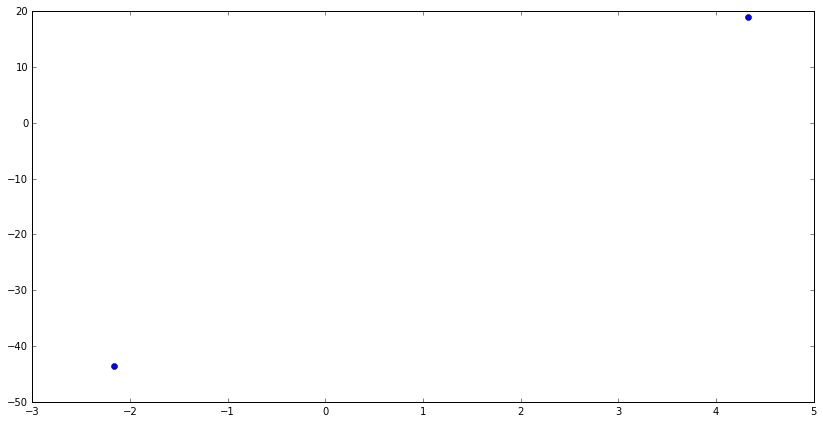

In [23]:
import requests
import json
import geojson
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

proxies = {'http':''}



json_str = '{"type":"FeatureCollection","features":[{"type":"Feature","geometry":{"type":"LineString","coordinates":[[23,-20.0],[-9.0, 35.0]]},"properties":{}}]}'
# Send the request
r = requests.get('http://127.0.0.1:8000/reconstruct/reconstruct_feature_collection/?feature_collection=%s' % json_str,
                 proxies=proxies)


json_str = '{"type":"FeatureCollection","features":[{"type":"Feature","geometry":{"type":"LineString","coordinates":[[23,-20.0],[-9.0, 35.0]]},"properties":{"id":[[1]]}}]}'
# Send the request
r = requests.get('http://127.0.0.1:8000/reconstruct/reconstruct_feature_collection/?id_field=''id''&feature_collection=%s' % json_str,
                 proxies=proxies)





# Print some details of the response
print r.status_code
print r.headers
print r.text
rp = json.loads(r.text)

print 'reconstructed features:'
print rp['features']

# Plot the result
plt.figure(figsize=(14,7))
#for feature in feature_collection:
#    plt.plot(feature['geometry']['coordinates'][0],feature['geometry']['coordinates'][1],'r.')

for rpf in rp['features']:
    plt.plot(np.asarray(rpf['geometry']['coordinates'])[:,0],np.asarray(rpf['geometry']['coordinates'])[:,1],'bo')
plt.show()

